In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print(df.head())

   ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  TrafficConditionNearby  QueueLength  IsSpecialDay LastUpdatedDate  \
0                    low            1             0      04-10-2016   
1                    low            1             0      04-10-2016   
2                    low            2             0      04-10-2016   
3                    low            2             0      04-10-2016   
4                    low            2             0      04-10-2016   

  LastUpdatedTime  
0        07:59:00  
1        08:25:00  
2        08:59:00  
3     

In [5]:
df['Price'] = np.nan # initial no price, just create a column 

In [17]:
base_price = 10.0
alpha = 0.99 #(determining factor)
# when the parking lot is full the price go up by approximatley one dollar as the demand would be higher for the next one

In [18]:
for lot_id in df['SystemCodeNumber'].unique():
    lot_df = df[df['SystemCodeNumber'] == lot_id].copy()
    lot_df = lot_df.sort_values('LastUpdatedTime')  # Sort by your time column beacuse the condition differ for each time slot
    
    price = base_price
    
    for idx, row in lot_df.iterrows():
        occupancy_rate = row['Occupancy'] / row['Capacity']
        price += alpha * occupancy_rate

        # Optional caps
        price = max(price, 10) # the min price for the cost of providing and using the parking space
        price = min(price, 45)
# the price can't be more than a mininimum value we can't charge, for our model it will be max 45
# The highest purchase price ever recorded for a single parking space was $1.3 million, paid in May 2021 in Hong Kong at 
# the ultra-luxury Mount Nicholson development near The Peak 
        # Save directly to df using the row index
        df.at[idx, 'Price'] = price

In [19]:
print(df.head())

   ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  TrafficConditionNearby  QueueLength  IsSpecialDay LastUpdatedDate  \
0                    low            1             0      04-10-2016   
1                    low            1             0      04-10-2016   
2                    low            2             0      04-10-2016   
3                    low            2             0      04-10-2016   
4                    low            2             0      04-10-2016   

  LastUpdatedTime      Price  
0        07:59:00  11.274818  
1        08:25:00  15.02

In [22]:
df.to_csv('Model_1_pricing_output.csv', index=False)

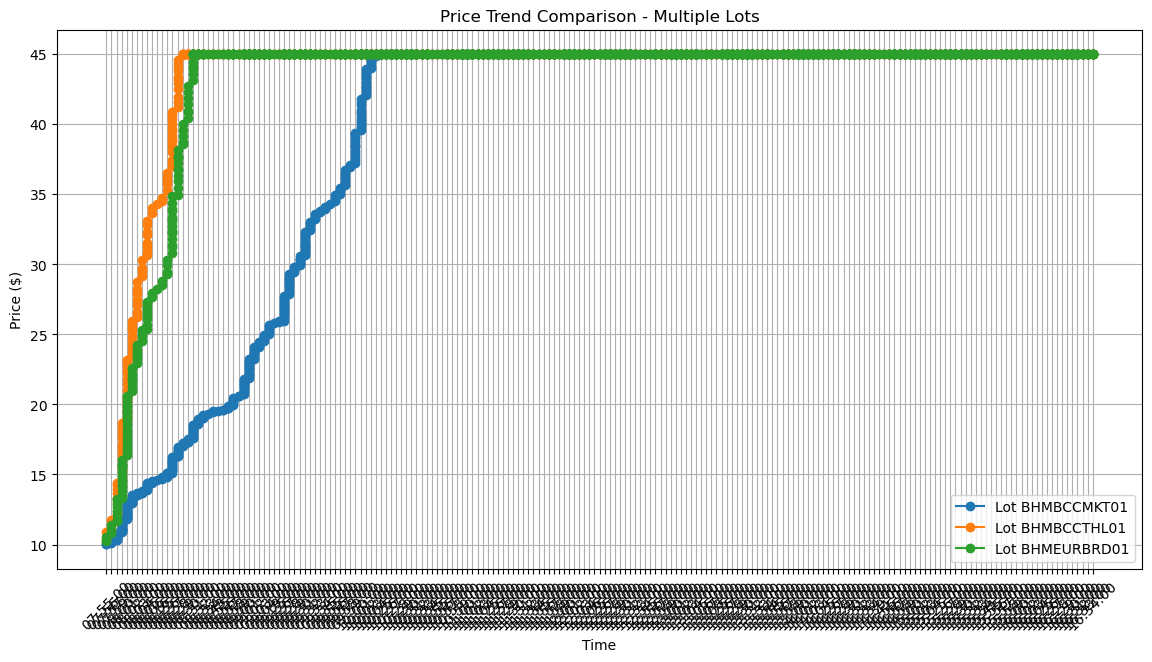

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Loop through 3 parking lots (or however many you want)
for lot_id in df['SystemCodeNumber'].unique()[:3]:
    lot_df = df[df['SystemCodeNumber'] == lot_id].copy().sort_values('LastUpdatedTime')
    plt.plot(lot_df['LastUpdatedTime'], lot_df['Price'], marker='o', label=f'Lot {lot_id}')

plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Price Trend Comparison - Multiple Lots')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
